In [ ]:
# 1. 폰트 캐시 삭제
# matplotlib의 폰트 캐시를 수동으로 삭제한 후 런타임을 재시작합니다. 이렇게 하면 matplotlib이 새로 설치된 폰트를 인식할 수 있습니다.
!rm -rf /root/.cache/matplotlib/

In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# Matplotlib 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name)


NanumBarunGothic
NanumGothicCoding
NanumSquare
NanumSquare
NanumMyeongjo
NanumGothicCoding
NanumSquareRound
NanumMyeongjo
NanumSquareRound
NanumGothic
NanumGothic
NanumBarunGothic


In [ ]:
! pip install fastai

In [ ]:
# from fastai.data.all import *
from fastai.vision.all import *
import pathlib
from google.colab import drive
drive.mount('/content/drive')
import os
import warnings
warnings.filterwarnings(action='ignore')

PROJECT_DIR = "/content/drive/MyDrive/새싹_3기/김치/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.listdir(PROJECT_DIR)  # 김치 종류 폴더 이름

['.DS_Store',
 '배추김치',
 '오이소박이',
 '파김치',
 '열무김치',
 '깍두기',
 '부추김치',
 '무생채',
 '백김치',
 '나박김치',
 '갓김치',
 '총각김치']

In [ ]:
fnames = get_image_files(PROJECT_DIR)
fnames[1000]

Path('/content/drive/MyDrive/새싹_3기/김치/오이소박이/Img_037_0301.jpg')

In [ ]:
fnames

(#5508) [Path('/content/drive/MyDrive/새싹_3기/김치/배추김치/Img_033_0044.jpg'),Path('/content/drive/MyDrive/새싹_3기/김치/배추김치/Img_033_0261.jpg'),Path('/content/drive/MyDrive/새싹_3기/김치/배추김치/Img_033_0470.jpg'),Path('/content/drive/MyDrive/새싹_3기/김치/배추김치/Img_033_0102.jpg'),Path('/content/drive/MyDrive/새싹_3기/김치/배추김치/Img_033_0353.jpg'),Path('/content/drive/MyDrive/새싹_3기/김치/배추김치/Img_033_0469.jpg'),Path('/content/drive/MyDrive/새싹_3기/김치/배추김치/Img_033_0412.jpg'),Path('/content/drive/MyDrive/새싹_3기/김치/배추김치/Img_033_0495.jpg'),Path('/content/drive/MyDrive/새싹_3기/김치/배추김치/Img_033_0482.jpg'),Path('/content/drive/MyDrive/새싹_3기/김치/배추김치/Img_033_0266.jpg')...]

In [ ]:
len(fnames)

5508

In [ ]:
fnames[4000].parts  # 라벨 정답 정보를 얻기 위해 경로 분석하기

('/',
 'content',
 'drive',
 'MyDrive',
 '새싹_3기',
 '김치',
 '백김치',
 'Img_034_0203.jpg')

In [ ]:
def label_func(fname):
    return str(fname.parts[-2])

dblock = DataBlock(get_items = get_image_files,
                   get_y     = label_func)

In [ ]:
dsets = dblock.datasets(PROJECT_DIR)
dsets.train[3401]

(Path('/content/drive/MyDrive/새싹_3기/김치/깍두기/Img_030_0399.jpg'), '깍두기')

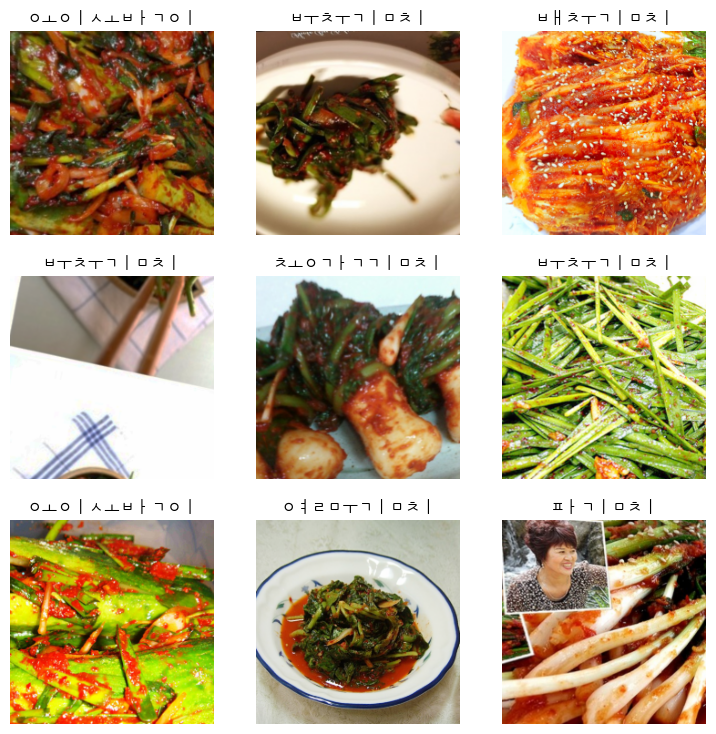

In [ ]:
# 데이터 블록 생성
datablock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=label_func,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(460),  # 큰 사이즈로 초기 리사이즈
    batch_tfms=[
        *aug_transforms(size=224, min_scale=0.75, flip_vert=True, max_rotate=20, max_zoom=1.2, max_lighting=0.3, max_warp=0.2),
        Normalize.from_stats(*imagenet_stats)
    ]
)


# 데이터 로더 생성
dls = datablock.dataloaders(PROJECT_DIR)

# 데이터 확인
dls.show_batch(max_n=9)

In [ ]:
dls.vocab

['갓김치', '깍두기', '나박김치', '무생채', '배추김치', '백김치', '부추김치', '열무김치', '오이소박이', '총각김치', '파김치']

### Model은 pytorch 사이트에서 선택.
https://pytorch.org/vision/main/models.html#using-models-from-hub

In [ ]:
learn = vision_learner(dls, resnet50, metrics=[accuracy, error_rate, Recall(average='macro'), Precision(average='macro')])

# opt_func=AdamW

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 184MB/s]


In [ ]:
learn.lr_find() # 적절한 학습률을 찾기 위해 사용, 이 메서드는 다양한 학습률에서 손실을 계산하여 가장 좋은 학습률을 추천합니다.

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
# pct_start : 작은 값으로 설정하면 초기에 학습률을 낮게 유지하고, 점차 증가시킵니다.
learn.fine_tune(epochs=3, freeze_epochs=1, base_lr=1e-4, pct_start=0.3)

epoch,train_loss,valid_loss,accuracy,error_rate,recall_score,precision_score,time
0,3.085494,1.543419,0.501362,0.498638,0.501604,0.489559,04:39


epoch,train_loss,valid_loss,accuracy,error_rate,recall_score,precision_score,time
0,2.046113,1.195616,0.616712,0.383288,0.617044,0.613999,05:48
1,1.707428,0.960399,0.698456,0.301544,0.698412,0.690430,05:54
2,1.514338,0.948539,0.693006,0.306994,0.693271,0.688985,05:48


In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learn.fit_one_cycle(2, lr_max=1e-4)

epoch,train_loss,valid_loss,accuracy,error_rate,recall_score,precision_score,time
0,1.158079,0.566123,0.824705,0.175295,0.824536,0.824104,05:50
1,0.881245,0.518742,0.831063,0.168937,0.831844,0.831974,05:50


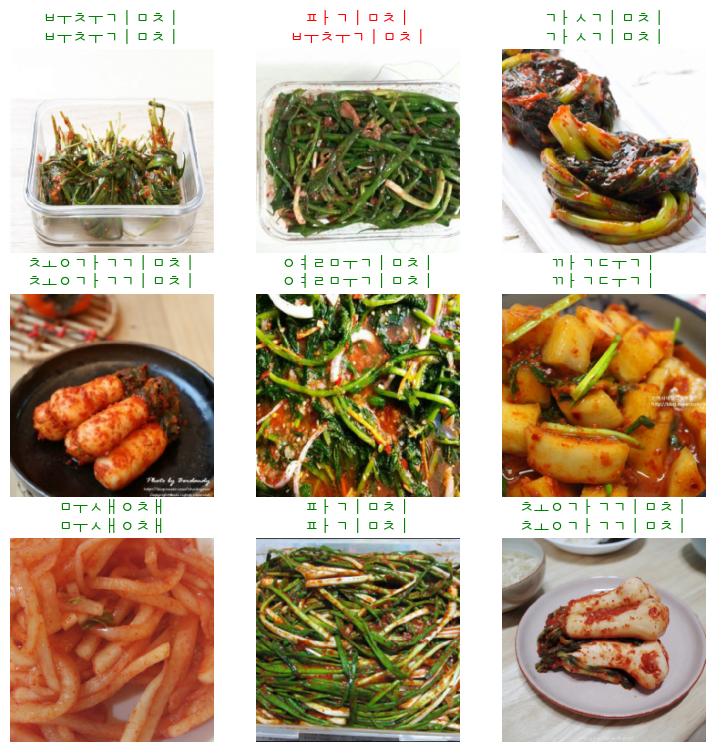

In [ ]:
learn.show_results(max_n=9)

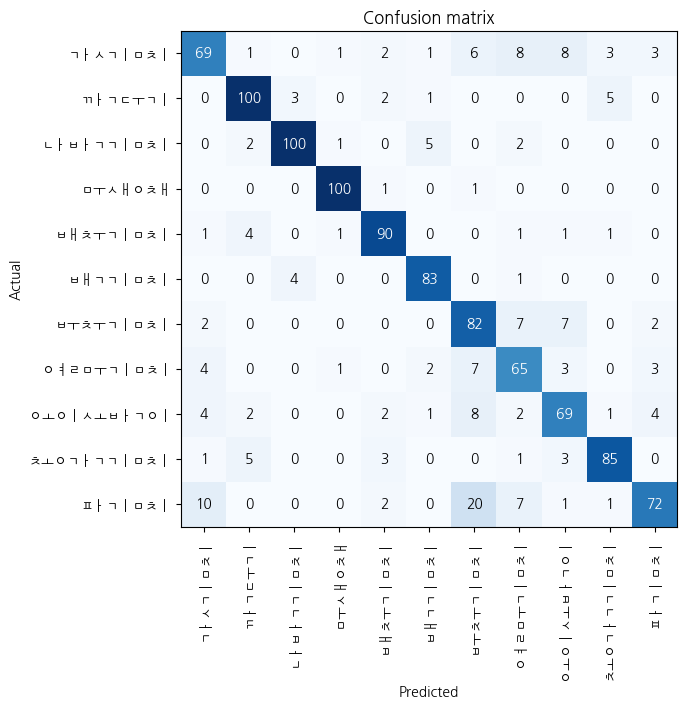

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(7,7))

In [ ]:
interp.most_confused()  # 잘못 분류한 case 수가 출력된다.

[('갓김치', '열무김치', 9),
 ('부추김치', '오이소박이', 8),
 ('파김치', '부추김치', 8),
 ('열무김치', '부추김치', 7),
 ('부추김치', '열무김치', 6),
 ('파김치', '갓김치', 6),
 ('오이소박이', '부추김치', 5),
 ('파김치', '열무김치', 5),
 ('갓김치', '오이소박이', 4),
 ('갓김치', '총각김치', 4),
 ('갓김치', '파김치', 4),
 ('오이소박이', '갓김치', 4),
 ('깍두기', '총각김치', 3),
 ('나박김치', '백김치', 3),
 ('열무김치', '갓김치', 3),
 ('열무김치', '백김치', 3),
 ('열무김치', '파김치', 3),
 ('총각김치', '깍두기', 3),
 ('총각김치', '배추김치', 3),
 ('갓김치', '백김치', 2),
 ('갓김치', '부추김치', 2),
 ('깍두기', '무생채', 2),
 ('깍두기', '배추김치', 2),
 ('무생채', '배추김치', 2),
 ('배추김치', '갓김치', 2),
 ('배추김치', '깍두기', 2),
 ('부추김치', '파김치', 2),
 ('오이소박이', '배추김치', 2),
 ('오이소박이', '파김치', 2),
 ('총각김치', '열무김치', 2),
 ('파김치', '총각김치', 2),
 ('갓김치', '나ᄇ

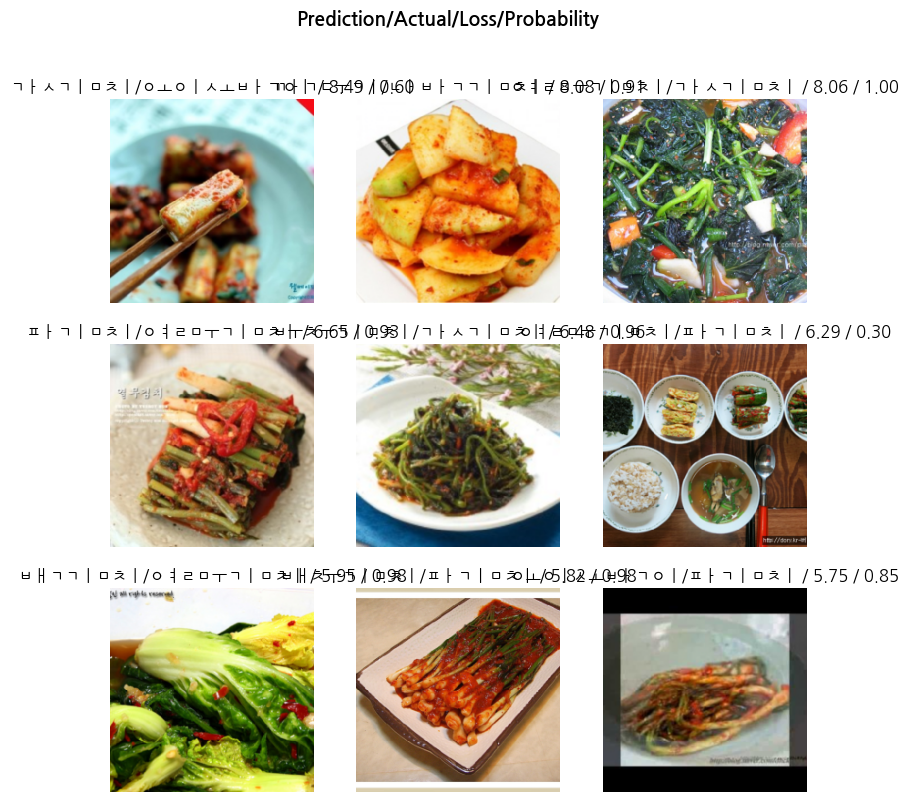

In [ ]:
interp.plot_top_losses(k=9) # 가장 losses가 큰 이미지 출력해보기

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# testset에 대한 예측결과확인

y_pred, y_true = learn.get_preds()
print(confusion_matrix(y_true, np.argmax(y_pred, axis=1)))
print(classification_report(y_true, np.argmax(y_pred, axis=1)))

[[ 75   0   1   1   0   2   2   9   4   4   4]
 [  0 102   1   2   2   0   0   0   1   3   0]
 [  0   1 104   0   1   3   0   1   0   0   0]
 [  0   0   0  99   2   0   0   1   0   0   0]
 [  2   2   0   1  91   0   0   1   0   1   1]
 [  0   0   1   0   0  87   0   0   0   0   0]
 [  1   0   0   0   0   0  83   6   8   0   2]
 [  3   0   0   1   0   3   7  67   0   1   3]
 [  4   0   0   0   2   1   5   1  77   1   2]
 [  0   3   0   0   3   0   0   2   0  90   0]
 [  6   0   0   0   0   1   8   5   0   2  91]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       102
           1       0.94      0.92      0.93       111
           2       0.97      0.95      0.96       110
           3       0.95      0.97      0.96       102
           4       0.90      0.92      0.91        99
           5       0.90      0.99      0.94        88
           6       0.79      0.83      0.81       100
           7       0.72      0.79      0.75      

In [ ]:
learn.export('identifying_Kimchi_model.pkl')